In [47]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

print("="*60)
print("STEP 1: KAGGLE SETUP VERIFICATION")
print("="*60)

# Check TensorFlow version
print(f"\nTensorFlow version: {tf.__version__}")

# Check GPUs available
gpus = tf.config.list_physical_devices('GPU')
print(f"GPUs available: {len(gpus)}")
if len(gpus) > 0:
    print(f"  GPU Details: {gpus[0]}")
    print("GPU IS READY TO USE!")
else:
    print("NO GPU DETECTED - CHECK SETTINGS!")

# Check CPUs
cpus = tf.config.list_physical_devices('CPU')
print(f"CPUs available: {len(cpus)}")

print("\n" + "="*60)
print("SYSTEM CONFIGURATION COMPLETE")
print("="*60)

STEP 1: KAGGLE SETUP VERIFICATION

TensorFlow version: 2.18.0
GPUs available: 1
  GPU Details: PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')
GPU IS READY TO USE!
CPUs available: 1

SYSTEM CONFIGURATION COMPLETE


In [48]:
# Install all required packages
print("Installing required packages...\n")

!pip install -q ta-lib pandas numpy scikit-learn tensorflow keras-tuner optuna

print("\nAll packages installed successfully!")

print("\nVerifying imports...")

import sklearn
import talib
print(f"scikit-learn: {sklearn.__version__}")
print(f"pandas: {pd.__version__}")
print(f"numpy: {np.__version__}")
print(f"tensorflow: {tf.__version__}")

print("\nAll imports successful!")

Installing required packages...


All packages installed successfully!

Verifying imports...
scikit-learn: 1.2.2
pandas: 2.2.3
numpy: 1.26.4
tensorflow: 2.18.0

All imports successful!


In [49]:
print("="*60)
print("LOADING ALL THREE CRYPTOCURRENCIES (2020)")
print("="*60)

import os
import glob

# Cryptocurrency Timeseries 2020 dataset path
crypto_path = '/kaggle/input/cryptocurrency-timeseries-2020'

print(f"\nDataset path: {crypto_path}")

if os.path.exists(crypto_path):
    # List all files
    all_files = os.listdir(crypto_path)
    csv_files = [f for f in all_files if f.endswith('.csv')]
    
    print(f"\nFound {len(csv_files)} CSV files:")
    for i, f in enumerate(csv_files, 1):
        file_size = os.path.getsize(os.path.join(crypto_path, f)) / 1024 / 1024
        print(f"  {i}. {f} ({file_size:.1f} MB)")
else:
    print(f"Dataset not found at: {crypto_path}")
    print("Make sure to add 'cryptocurrency-timeseries-2020' as input in your Kaggle notebook")

print("\n" + "="*60)
print("LOADING THREE CRYPTOCURRENCIES FROM GEMINI EXCHANGE")
print("="*60)

# Dictionary to store dataframes
crypto_data = {}

# Load Bitcoin
print("\nLoading BITCOIN (BTC) from Gemini...")
try:
    btc_file = os.path.join(crypto_path, 'gemini_BTCUSD_2020_1min.csv')
    df_btc = pd.read_csv(btc_file)
    crypto_data['BTC'] = df_btc
    print(f"Loaded: gemini_BTCUSD_2020_1min.csv")
    print(f"Shape: {df_btc.shape}")
    print(f"Columns: {df_btc.columns.tolist()}")
except FileNotFoundError:
    print(f"File not found: gemini_BTCUSD_2020_1min.csv")
    crypto_data['BTC'] = None
except Exception as e:
    print(f"Error loading BTC: {e}")
    crypto_data['BTC'] = None

# Load Litecoin
print("\nLoading LITECOIN (LTC) from Gemini...")
try:
    ltc_file = os.path.join(crypto_path, 'gemini_LTCUSD_2020_1min.csv')
    df_ltc = pd.read_csv(ltc_file)
    crypto_data['LTC'] = df_ltc
    print(f"Loaded: gemini_LTCUSD_2020_1min.csv")
    print(f"Shape: {df_ltc.shape}")
    print(f"Columns: {df_ltc.columns.tolist()}")
except FileNotFoundError:
    print(f"File not found: gemini_LTCUSD_2020_1min.csv")
    crypto_data['LTC'] = None
except Exception as e:
    print(f"Error loading LTC: {e}")
    crypto_data['LTC'] = None

# Load Ethereum
print("\nLoading ETHEREUM (ETH) from Gemini...")
try:
    eth_file = os.path.join(crypto_path, 'gemini_ETHUSD_2020_1min.csv')
    df_eth = pd.read_csv(eth_file)
    crypto_data['ETH'] = df_eth
    print(f"Loaded: gemini_ETHUSD_2020_1min.csv")
    print(f"Shape: {df_eth.shape}")
    print(f"Columns: {df_eth.columns.tolist()}")
except FileNotFoundError:
    print(f"File not found: gemini_ETHUSD_2020_1min.csv")
    crypto_data['ETH'] = None
except Exception as e:
    print(f"Error loading ETH: {e}")
    crypto_data['ETH'] = None

print("\n" + "="*60)
print("MULTI-CRYPTO DATASET SUMMARY")
print("="*60)

datasets_info = []

for ticker in ['BTC', 'LTC', 'ETH']:
    if ticker in crypto_data and crypto_data[ticker] is not None:
        df = crypto_data[ticker]
        datasets_info.append((ticker, df.shape))
        print(f"\n{ticker}:")
        print(f"Rows: {df.shape[0]:,}")
        print(f"Columns: {df.shape[1]}")
        print(f"Exchange: Gemini")
        print(f"Period: 2020")
        print(f"Interval: 1-minute")
    else:
        print(f"\n{ticker}: NOT LOADED")

print(f"\nTOTAL DATASETS LOADED: {len(datasets_info)}/3")
print(f"STRATEGY: Multi-Crypto Analysis (Gemini Exchange, 2020)")
print(f"DATA SOURCE: cryptocurrency-timeseries-2020")
print(f"Ready for data cleaning\n")

LOADING ALL THREE CRYPTOCURRENCIES (2020)

Dataset path: /kaggle/input/cryptocurrency-timeseries-2020

Found 3 CSV files:
  1. gemini_LTCUSD_2020_1min.csv (40.1 MB)
  2. gemini_ETHUSD_2020_1min.csv (44.1 MB)
  3. gemini_BTCUSD_2020_1min.csv (49.5 MB)

LOADING THREE CRYPTOCURRENCIES FROM GEMINI EXCHANGE

Loading BITCOIN (BTC) from Gemini...
Loaded: gemini_BTCUSD_2020_1min.csv
Shape: (658065, 8)
Columns: ['Unix Timestamp', 'Date', 'Symbol', 'Open', 'High', 'Low', 'Close', 'Volume']

Loading LITECOIN (LTC) from Gemini...
Loaded: gemini_LTCUSD_2020_1min.csv
Shape: (658011, 8)
Columns: ['Unix Timestamp', 'Date', 'Symbol', 'Open', 'High', 'Low', 'Close', 'Volume']

Loading ETHEREUM (ETH) from Gemini...
Loaded: gemini_ETHUSD_2020_1min.csv
Shape: (658059, 8)
Columns: ['Unix Timestamp', 'Date', 'Symbol', 'Open', 'High', 'Low', 'Close', 'Volume']

MULTI-CRYPTO DATASET SUMMARY

BTC:
Rows: 658,065
Columns: 8
Exchange: Gemini
Period: 2020
Interval: 1-minute

LTC:
Rows: 658,011
Columns: 8
Exchange: 

In [50]:
print("="*60)
print("DATA CLEANING & PREPARATION (ALL 3 CRYPTOS - 2020)")
print("="*60)

# Function to clean cryptocurrency data
def clean_crypto_data(df, name):
    """Clean and prepare cryptocurrency data"""
    print(f"\nCleaning {name}...")
    
    if df is None:
        print(f"{name} data is None, skipping")
        return None
    
    df = df.copy()
    
    # Handle different date column names
    if 'Date' in df.columns:
        df['Date'] = pd.to_datetime(df['Date'])
    elif 'Timestamp' in df.columns:
        df['Timestamp'] = pd.to_datetime(df['Timestamp'])
        df['Date'] = df['Timestamp']
    elif 'date' in df.columns:
        df['date'] = pd.to_datetime(df['date'])
        df['Date'] = df['date']
    else:
        # Create date from index if available
        try:
            df['Date'] = pd.to_datetime(df.index)
        except:
            print(f"Could not convert date - no date column found")
            return None
    
    # Sort by date
    df = df.sort_values('Date').reset_index(drop=True)
    
    print(f"Date range: {df['Date'].min()} to {df['Date'].max()}")
    
    # Check missing values
    missing = df.isnull().sum()
    if missing.sum() == 0:
        print(f"No missing values")
    else:
        print(f"Missing values found:")
        for col in df.columns:
            if missing[col] > 0:
                print(f"      {col}: {missing[col]}")
    
    # Remove duplicates
    initial = len(df)
    df = df.drop_duplicates(subset=['Date']).reset_index(drop=True)
    removed = initial - len(df)
    if removed > 0:
        print(f"Removed {removed} duplicate rows")
    
    print(f"Final shape: {df.shape}")
    
    return df

# Clean all three cryptos
print("\n" + "-"*60)
crypto_data['BTC'] = clean_crypto_data(crypto_data['BTC'], "BITCOIN (BTC)")
crypto_data['LTC'] = clean_crypto_data(crypto_data['LTC'], "LITECOIN (LTC)")
crypto_data['ETH'] = clean_crypto_data(crypto_data['ETH'], "ETHEREUM (ETH)")

print("\n" + "="*60)
print("SUMMARY: ALL THREE CRYPTOS CLEANED")
print("="*60)

for ticker in ['BTC', 'LTC', 'ETH']:
    if ticker in crypto_data and crypto_data[ticker] is not None:
        df = crypto_data[ticker]
        print(f"\n{ticker}:")
        print(f"  Shape: {df.shape}")
        print(f"  Date range: {df['Date'].min().date()} to {df['Date'].max().date()}")
        if 'Close' in df.columns:
            print(f"  Close price range: ${df['Close'].min():.2f} - ${df['Close'].max():.2f}")
    else:
        print(f"\n{ticker}:NOT LOADED")

print("\nDATA CLEANING COMPLETE - READY FOR ANALYSIS\n")

DATA CLEANING & PREPARATION (ALL 3 CRYPTOS - 2020)

------------------------------------------------------------

Cleaning BITCOIN (BTC)...
Date range: 2020-01-01 00:00:00 to 2021-04-20 00:02:00
No missing values
Final shape: (658065, 8)

Cleaning LITECOIN (LTC)...
Date range: 2020-01-01 00:00:00 to 2021-04-20 00:03:00
No missing values
Final shape: (658011, 8)

Cleaning ETHEREUM (ETH)...
Date range: 2020-01-01 00:00:00 to 2021-04-20 00:03:00
No missing values
Final shape: (658059, 8)

SUMMARY: ALL THREE CRYPTOS CLEANED

BTC:
  Shape: (658065, 8)
  Date range: 2020-01-01 to 2021-04-20
  Close price range: $3935.29 - $64890.00

LTC:
  Shape: (658011, 8)
  Date range: 2020-01-01 to 2021-04-20
  Close price range: $24.93 - $335.53

ETH:
  Shape: (658059, 8)
  Date range: 2020-01-01 to 2021-04-20
  Close price range: $88.88 - $2547.64

DATA CLEANING COMPLETE - READY FOR ANALYSIS



EXPLORATORY DATA ANALYSIS (MULTI-CRYPTO - 2020)

BTC PRICE STATISTICS (2020)
  Min price: $3935.29
  Max price: $64890.00
  Mean price: $19816.13
  Median price: $10936.15
  Std dev: $16737.68

BTC RETURNS STATISTICS
  Mean return: 0.000394% (per minute)
  Std dev: 0.1289%
  Max gain: 8.3883%
  Max loss: -7.0294%

BTC VOLUME STATISTICS
  Mean volume: 1.55
  Total volume: 1.02e+06

LTC PRICE STATISTICS (2020)
  Min price: $24.93
  Max price: $335.53
  Mean price: $87.28
  Median price: $57.95
  Std dev: $60.85

LTC RETURNS STATISTICS
  Mean return: 0.000469% (per minute)
  Std dev: 0.1954%
  Max gain: 24.0645%
  Max loss: -15.7975%

LTC VOLUME STATISTICS
  Mean volume: 17.51
  Total volume: 1.15e+07

ETH PRICE STATISTICS (2020)
  Min price: $88.88
  Max price: $2547.64
  Mean price: $626.05
  Median price: $368.16
  Std dev: $608.54

ETH RETURNS STATISTICS
  Mean return: 0.000560% (per minute)
  Std dev: 0.1628%
  Max gain: 12.3731%
  Max loss: -7.5750%

ETH VOLUME STATISTICS
  Mean vol

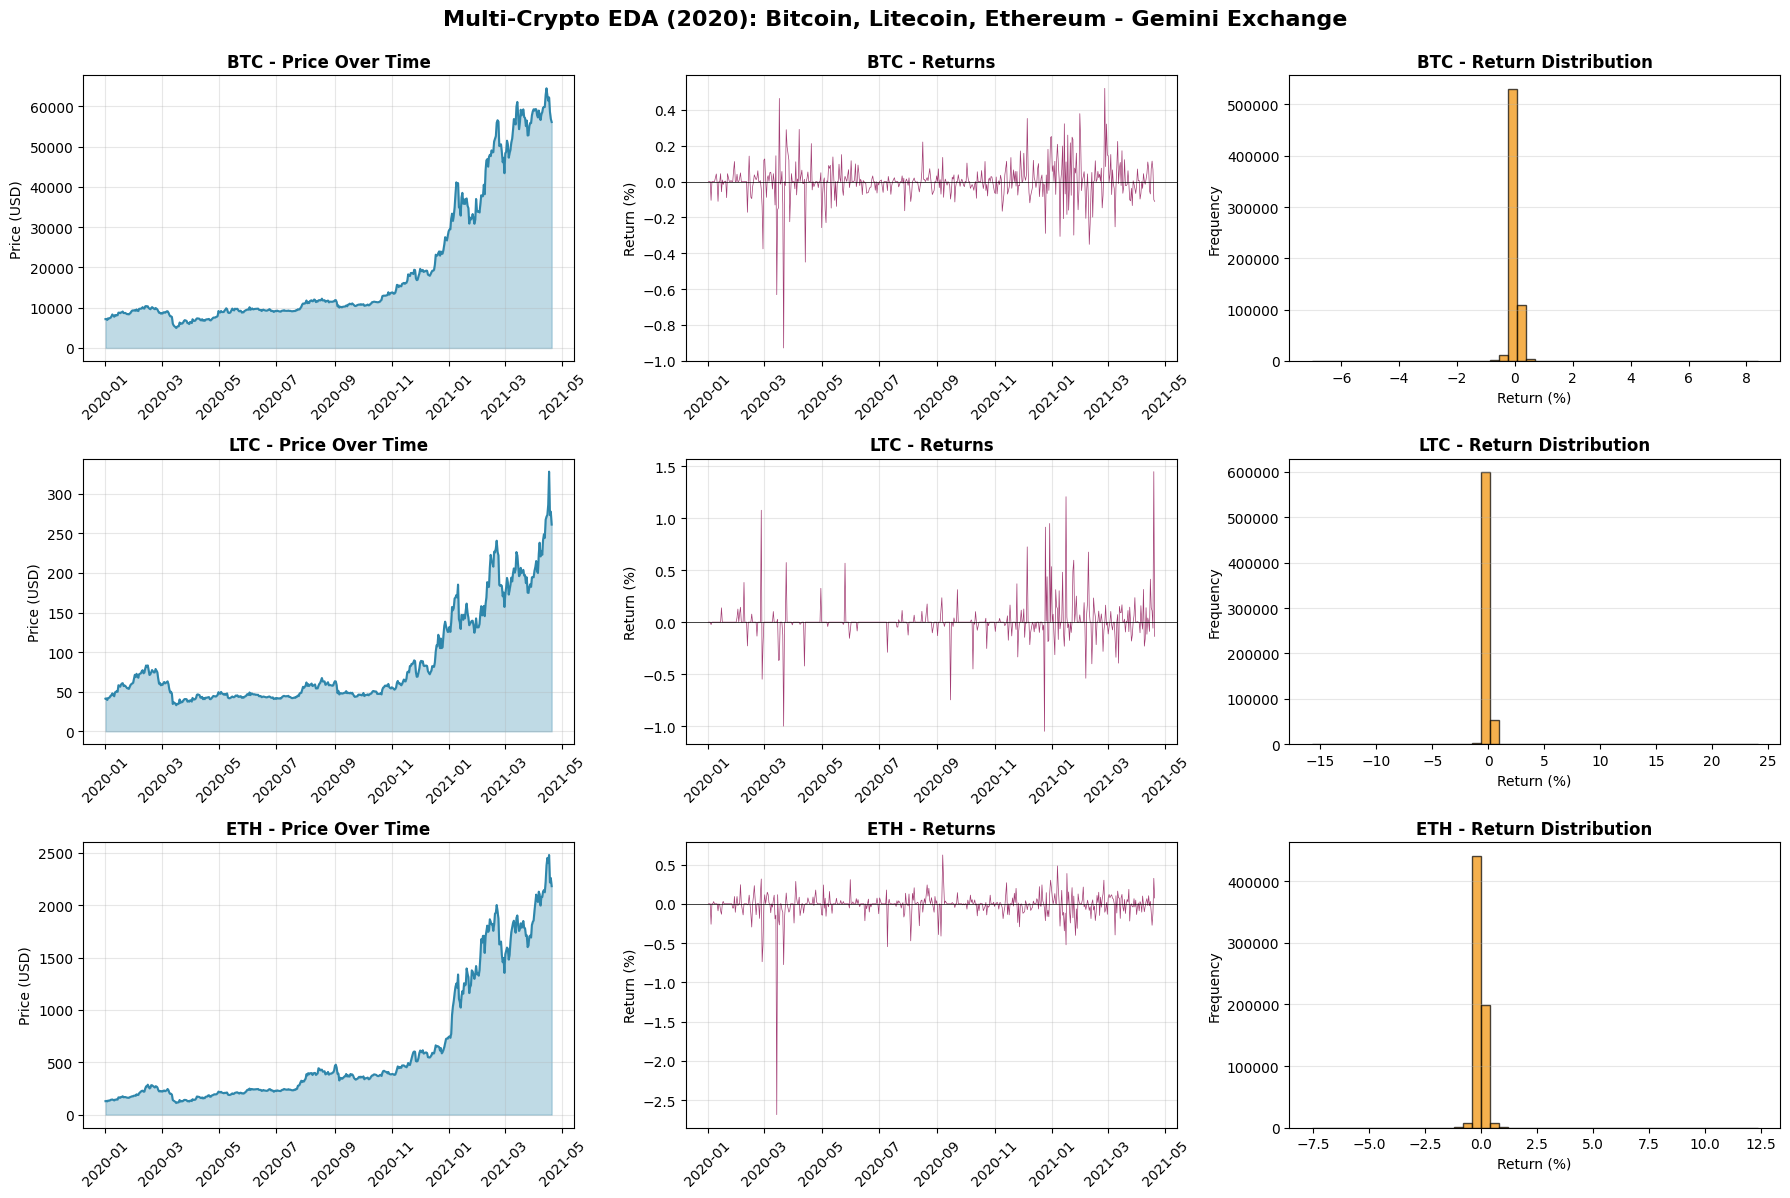


BTC:
  Shape: (658065, 8)
  Date range: 2020-01-01 to 2021-04-20

LTC:
  Shape: (658011, 8)
  Date range: 2020-01-01 to 2021-04-20

ETH:
  Shape: (658059, 8)
  Date range: 2020-01-01 to 2021-04-20

All three cryptos: BTC, LTC, ETH prepared and analyzed
Data source: cryptocurrency-timeseries-2020 (Gemini Exchange, 2020)



In [51]:
print("="*60)
print("EXPLORATORY DATA ANALYSIS (MULTI-CRYPTO - 2020)")
print("="*60)

# Create statistics for all three cryptos
crypto_stats = {}

for ticker in ['BTC', 'LTC', 'ETH']:
    if ticker not in crypto_data or crypto_data[ticker] is None:
        continue
    
    df = crypto_data[ticker]
    
    print(f"\n{'='*60}")
    print(f"{ticker} PRICE STATISTICS (2020)")
    print(f"{'='*60}")
    
    close_prices = df['Close'].dropna()
    daily_returns = df['Close'].pct_change() * 100
    daily_returns = daily_returns.dropna()
    
    stats = {
        'min': close_prices.min(),
        'max': close_prices.max(),
        'mean': close_prices.mean(),
        'median': close_prices.median(),
        'std': close_prices.std(),
        'return_mean': daily_returns.mean(),
        'return_std': daily_returns.std(),
        'return_max': daily_returns.max(),
        'return_min': daily_returns.min(),
    }
    
    crypto_stats[ticker] = {
        'df': df,
        'close_prices': close_prices,
        'daily_returns': daily_returns,
        'stats': stats
    }
    
    print(f"  Min price: ${stats['min']:.2f}")
    print(f"  Max price: ${stats['max']:.2f}")
    print(f"  Mean price: ${stats['mean']:.2f}")
    print(f"  Median price: ${stats['median']:.2f}")
    print(f"  Std dev: ${stats['std']:.2f}")
    
    print(f"\n{ticker} RETURNS STATISTICS")
    print(f"  Mean return: {stats['return_mean']:.6f}% (per minute)")
    print(f"  Std dev: {stats['return_std']:.4f}%")
    print(f"  Max gain: {stats['return_max']:.4f}%")
    print(f"  Max loss: {stats['return_min']:.4f}%")
    
    if 'Volume' in df.columns:
        print(f"\n{ticker} VOLUME STATISTICS")
        print(f"  Mean volume: {df['Volume'].mean():.2f}")
        print(f"  Total volume: {df['Volume'].sum():.2e}")

print("\n" + "="*60)
print("GENERATING MULTI-CRYPTO VISUALIZATIONS")
print("="*60)

# Create 3x3 grid: one row per crypto, 3 columns (price, returns, histogram)
fig, axes = plt.subplots(3, 3, figsize=(18, 12))
fig.suptitle('Multi-Crypto EDA (2020): Bitcoin, Litecoin, Ethereum - Gemini Exchange', 
             fontsize=16, fontweight='bold', y=0.995)

tickers = ['BTC', 'LTC', 'ETH']

for row_idx, ticker in enumerate(tickers):
    if ticker not in crypto_stats or crypto_stats[ticker] is None:
        # Skip if data not available
        for col_idx in range(3):
            axes[row_idx, col_idx].text(0.5, 0.5, f'{ticker}: Data not available',
                                        ha='center', va='center',
                                        transform=axes[row_idx, col_idx].transAxes)
            axes[row_idx, col_idx].set_title(f'{ticker}', fontweight='bold')
        continue
    
    df = crypto_stats[ticker]['df']
    close_prices = crypto_stats[ticker]['close_prices']
    daily_returns = crypto_stats[ticker]['daily_returns']
    
    # Subsample for faster plotting (keep every Nth point)
    sample_rate = max(1, len(df) // 500)
    df_plot = df.iloc[::sample_rate].copy()
    
    # Column 0: Price over time
    axes[row_idx, 0].plot(df_plot['Date'], df_plot['Close'], 
                          linewidth=1.5, color='#2E86AB')
    axes[row_idx, 0].fill_between(df_plot['Date'], df_plot['Close'], 
                                   alpha=0.3, color='#2E86AB')
    axes[row_idx, 0].set_title(f'{ticker} - Price Over Time', fontweight='bold')
    axes[row_idx, 0].set_ylabel('Price (USD)')
    axes[row_idx, 0].grid(alpha=0.3)
    axes[row_idx, 0].tick_params(axis='x', rotation=45)
    
    # Column 1: Daily returns
    returns_plot = daily_returns.iloc[::sample_rate].reset_index(drop=True)
    dates_for_returns = df_plot['Date'][1:].reset_index(drop=True)
    min_len = min(len(returns_plot), len(dates_for_returns))
    
    axes[row_idx, 1].plot(dates_for_returns[:min_len], returns_plot[:min_len],
                          linewidth=0.5, color='#A23B72')
    axes[row_idx, 1].axhline(y=0, color='black', linestyle='-', linewidth=0.5)
    axes[row_idx, 1].set_title(f'{ticker} - Returns', fontweight='bold')
    axes[row_idx, 1].set_ylabel('Return (%)')
    axes[row_idx, 1].grid(alpha=0.3)
    axes[row_idx, 1].tick_params(axis='x', rotation=45)
    
    # Column 2: Return distribution
    axes[row_idx, 2].hist(daily_returns, bins=50, edgecolor='black', 
                          alpha=0.7, color='#F18F01')
    axes[row_idx, 2].set_title(f'{ticker} - Return Distribution', fontweight='bold')
    axes[row_idx, 2].set_xlabel('Return (%)')
    axes[row_idx, 2].set_ylabel('Frequency')
    axes[row_idx, 2].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('01_multi_crypto_eda_2020.png', dpi=150, bbox_inches='tight')
print("Saved: 01_multi_crypto_eda_2020.png")
plt.show()

for ticker in tickers:
    if ticker in crypto_stats and crypto_stats[ticker] is not None:
        df = crypto_stats[ticker]['df']
        print(f"\n{ticker}:")
        print(f"  Shape: {df.shape}")
        print(f"  Date range: {df['Date'].min().date()} to {df['Date'].max().date()}")

print(f"\nAll three cryptos: BTC, LTC, ETH prepared and analyzed")
print(f"Data source: cryptocurrency-timeseries-2020 (Gemini Exchange, 2020)\n")